# Instructions for getting dataframe from RDS

```
get_batch_data(
    base_coin='ETH',
    quote_coin='BTC',
    start_time='2021-01-01',                  #YYYY-MM-DD
    end_time='2021-07-01',                    #YYYY-MM-DD
    columns=['close','close_30','close_100'], # any valid features with `_x` suffix support
    batch_size=1000000,                       # Large number to get everything
    extra_rows=10,                            # Fetch extra rows for custom feature engineering
    use_cache=False,                          # Cache can be used when current time > end_time
)

VALID_FEATURES = [
    'pair_id','open_time','close_time','dow','tod',
    'open','high','low','close',
    'number_of_trades','volume','quote_asset_volume','taker_buy_base_asset_volume','taker_buy_quote_asset_volume',
    'ma14','ma30','ma90',
    'sup14','sup30','sup90',
    'res14','res30','res90',
    'atr','atr_diff','atr_ma14',
    'rsi','rsi_diff','rsi_ma14',
    'trend_up','trend_up3','trend_up14','trend_up30',
    'cs_ss','cs_ssr','cs_hm','cs_hmr','cs_brh','cs_buh','cs_ebu','cs_ebr'
]
```

# Instructions for Manual Simulation

1. Decide on a name for your model.  Add first letter of your name and numbers as prefix  For example: `t0_dummy`.
2. Create a `.py` file with the name of your model in the `trade_models` directory (`./trade_models/t0_dummy.py`)
3. Import your model in `./trade_models/__init__.py` by adding `from . import t0_dummy`
4. Place any pre-trained models or scalers into the `./trade_models/assets/` directory with your model name as prefix.
5. Configure portfolio in the following cells.
    1. For `max_batch_size`, it is purely for memory considerations.  It does an SQL query per batch, so don't make it too small.
    2. Parameters inside portfolios are accessible inside the trade models
6. Run all

Sample portfolio (all fields must exist)
```
    {
        # Common parameters
        'portfolio_name' : f'ETH <-> BTC t0_dummy no fees',
        'trade_model' : 't0_dummy',      # name of the model to use
        'starting_coin' : 'ETH',         # aka the "base" coin
        'pair_coin' : 'BTC',             # aka the "quote" coin
        'max_batch_size' : 10000,        # how many entries to process per batch
        'starting_funds' : 16,           # amount of funds for starting coin
        'trading_fees_percent' : 0.1,    # trading fees in percent (0.1%)
        'trading_fees_buy' : 0.005,      # (0.005 ETH transaction fee to buy BTC)
        'trading_fees_sell' : 0.0004,    # (0.0004 BTC transaction fee to sell back to ETC)

        # Optional model specific parameteres
        'parameter_sample' : 'test',     # these variables are accessible in your model
    }
```

In [1]:
start_simulation = '2017-08-17'#'2018-01-01' #YYYY-MM-DD
end_simulation = '2021-07-01' #YYYY-MM-DD

lhs, rhs = 'ETH', 'BTC'
#lhs, rhs = 'BTC', 'USDT'
# init_amount = 16
init_amount = 10
data_size = -1

portfolios = [
    {
        # Common parameters
        'portfolio_name' : f'{lhs} <-> {rhs} s0_momentum additional feature no fees',
        'trade_model' : 's0_momentum_addvar',
        'extra_rows' : 2,
        'starting_coin' : f'{lhs}',
        'pair_coin' : f'{rhs}',
        'max_batch_size' : 1000000,
        'starting_funds' : init_amount,
        'trading_fees' : 0.0,
        'trading_fees_percent' : 0.000,
        'trading_fees_buy' : 0.0,
        'trading_fees_sell' : 0.0,
        
        # for tests
        'data_size' : data_size, #-1 => all
    }
    ,
    {
        # Common parameters
        'portfolio_name' : f'{lhs} <-> {rhs} s0_momentum no fees',
        'trade_model' : 's0_momentum',
        'starting_coin' : f'{lhs}',
        'pair_coin' : f'{rhs}',
        'max_batch_size' : 1000000,
        'extra_rows' : 2,
        'starting_funds' : init_amount,
        'trading_fees_percent' : 0.0,
        'trading_fees' : 0.0,
        'trading_fees_buy' : 0.0,
        'trading_fees_sell' : 0.0,

        # Model specific parameteres
        'data_size' : data_size,
    },
#         {
#         # Common parameters
#         'portfolio_name' : f'{lhs} <-> {rhs} s0_momentum no fees',
#         'trade_model' : 's0_momentum',
#         'extra_rows' : 2,
#         'starting_coin' : f'{lhs}',
#         'pair_coin' : f'{rhs}',
#         'max_batch_size' : 1000000,
#         'starting_funds' : init_amount,
#         'trading_fees' : 0.0,
#         'trading_fees_percent' : 0.000,
#         'trading_fees_buy' : 0.0,
#         'trading_fees_sell' : 0.0,
        
#         # for tests
#         'data_size' : data_size, #-1 => all
#     }
#     ,
#     {
#         # Common parameters
#         'portfolio_name' : f'{lhs} <-> {rhs} s0_momentum percentage fees',
#         'trade_model' : 's0_momentum',
#         'starting_coin' : f'{lhs}',
#         'pair_coin' : f'{rhs}',
#         'max_batch_size' : 1000000,
#         'extra_rows' : 2,
#         'starting_funds' : init_amount,
#         'trading_fees_percent' : 0.1,
#         'trading_fees' : 0.0,
#         'trading_fees_buy' : 0.0,
#         'trading_fees_sell' : 0.0,

#         # Model specific parameteres
#         'data_size' : -1,
#     },
#     {
#         # Common parameters
#         'portfolio_name' : f'ETH <-> BTC t0_dummy bitflyer fees',
#         'trade_model' : 't0_dummy',
#         'starting_coin' : 'ETH',
#         'pair_coin' : 'BTC',
#         'max_batch_size' : 20000,
#         'extra_rows' : 2,
#         'starting_funds' : 16,
#         'trading_fees_percent' : 0.0,
#         'trading_fees_buy' : 0.005,
#         'trading_fees_sell' : 0.0004,

#         # Model specific parameteres
#         'parameter_sample' : 'test',
#     },
#     {
#         # Common parameters
#         'portfolio_name' : f'ETH <-> BTC t0_dummy 0.1% fees',
#         'trade_model' : 't0_dummy',
#         'starting_coin' : 'ETH',
#         'pair_coin' : 'BTC',
#         'max_batch_size' : 20000,
#         'extra_rows' : 2,
#         'starting_funds' : 16,
#         'trading_fees_percent' : 0.1,
#         'trading_fees_buy' : 0.0,
#         'trading_fees_sell' : 0.0,

#         # Model specific parameteres
#         'parameter_sample' : 'test',
#     },
#     {
#         # Common parameters
#         'portfolio_name' : f'BTC <-> ETH t0_dummy no fees',
#         'trade_model' : 't0_dummy',
#         'starting_coin' : 'BTC',
#         'pair_coin' : 'ETH',
#         'max_batch_size' : 20000,
#         'extra_rows' : 2,
#         'starting_funds' : 1,
#         'trading_fees_percent' : 0.0,
#         'trading_fees_buy' : 0.0,
#         'trading_fees_sell' : 0.0,

#         # Model specific parameteres
#         'parameter_sample' : 'test',
#     },
#     {
#         # Common parameters
#         'portfolio_name' : f'BTC <-> ETH t0_dummy bitflyer fees',
#         'trade_model' : 't0_dummy',
#         'starting_coin' : 'BTC',
#         'pair_coin' : 'ETH',
#         'max_batch_size' : 20000,
#         'extra_rows' : 2,
#         'starting_funds' : 1,
#         'trading_fees_percent' : 0.0,
#         'trading_fees_buy' : 0.0004,
#         'trading_fees_sell' : 0.005,

#         # Model specific parameteres
#         'parameter_sample' : 'test',
#     },
#     {
#         # Common parameters
#         'portfolio_name' : f'BTC <-> ETH t0_dummy 0.1% fees',
#         'trade_model' : 't0_dummy',
#         'starting_coin' : 'BTC',
#         'pair_coin' : 'ETH',
#         'max_batch_size' : 20000,
#         'extra_rows' : 2,
#         'starting_funds' : 1,
#         'trading_fees_percent' : 0.1,
#         'trading_fees_buy' : 0.0,
#         'trading_fees_sell' : 0.0,

#         # Model specific parameteres
#         'parameter_sample' : 'test',
#     },
]

# portfolios = [
#     {
#         'portfolio_name' : f'NM_ETHBTC_NaiveBayes_1.10',
#         'trade_model' : 'n1_alpha1',
#         'starting_coin' : 'ETH',
#         'pair_coin' : 'BTC',
#         'max_batch_size' : 10000,
#         'extra_rows' : 0,
#         'starting_funds' : 1,
#         'trading_fees_percent' : 0.1,
#         'trading_fees_buy' : 0,
#         'trading_fees_sell' : 0,
#         'model_filepath': 'trade_models/assets/nm_gnb_ethbtc_2108011401.pkl',
#         'model_use_atr' : True,
#         'model_ratio' : (4,2),
#         'model_reverse' : True,
#         'model_lookback_days' : 0,
#     }
# ]

# STOP

You shouldn't need to modify anything below this cell

# CODE FOR SIMULATION STARTS

In [2]:
import psycopg2
import pandas as pd
import numpy as np
import re
from datetime import datetime
import pytz
import re
from operator import itemgetter

# models
import trade_models

VALID_FEATURES = [
    'pair_id','open_time','close_time','dow','tod',
    'open','high','low','close',
    'number_of_trades','volume','quote_asset_volume','taker_buy_base_asset_volume','taker_buy_quote_asset_volume',
    'ma14','ma30','ma90',
    'sup14','sup30','sup90',
    'res14','res30','res90',
    'atr','atr_diff','atr_ma14',
    'rsi','rsi_diff','rsi_ma14',
    'trend_up','trend_up3','trend_up14','trend_up30',
    'cs_ss','cs_ssr','cs_hm','cs_hmr','cs_brh','cs_buh','cs_ebu','cs_ebr'
]

In [3]:
# local postgres connection only
import hidden
sql_string = hidden.psycopg2(hidden.secrets())
print('PostgreSQL connection data taken from hidden.py')

# Make the connection and cursor
conn = psycopg2.connect(sql_string, connect_timeout=3)

PostgreSQL connection data taken from hidden.py


In [4]:
# validate inputs and portfolio parameters

def validate(date_text):
    try:
        datetime.strptime(date_text, '%Y-%m-%d')
    except ValueError:
        raise ValueError("Incorrect data format, should be YYYY-MM-DD")
        
# validate start / end string format input to protect against injection
validate(start_simulation)
validate(end_simulation)

for p in portfolios:
    # validate symbol
    assert re.match('^[A-Z]{2,}$', p['starting_coin']), f"{p['starting_coin']} is invalid starting coin"
    assert re.match('^[A-Z]{2,}$', p['pair_coin']), f"{p['pair_coin']} is invalid pair coin"

    # validate starting funds
    assert p['starting_funds'] > 0, "Starting funds for must be > 0"

    # validate fees
#     assert p['trading_fees_percent'] >= 0, "Trading Fees % for must be >= 0%"
#     assert p['trading_fees_percent'] < 100, "Trading Fees % for must be < 100%"
#     assert p['trading_fees_buy'] >= 0, "Trading Fees (buy) for must be >= 0"
#     assert p['trading_fees_sell'] >= 0, "Trading Fees (sell) for must be >= 0"

    # validate batch size
    assert (isinstance(p['max_batch_size'], int) and p['max_batch_size'] > 0), f"{p['max_batch_size']} is not a valid batch size"

    # maybe we should validate model names too!
    # TODO: validate model names

In [5]:
# These are only used for caching
import hashlib
import pickle

def get_batch_data(base_coin, quote_coin, start_time, end_time, columns, batch_size=10000, extra_rows=0, use_cache=True):
    column_info = [(x,) + re.match('^(?P<feature>[a-z][a-z0-9]*(?:_[a-z][a-z0-9]*)*)(?:_(?P<shift>[0-9]{1,3}))?$',x).groups() for x in columns]
    max_lookback = max([(0 if x==None else int(x)) for _,_,x in column_info])
    s = base_coin+quote_coin+f"{start_time}"+f"{end_time}"+"".join(columns)+str(batch_size)+str(extra_rows)
    h = hashlib.md5(s.encode('utf-8')).hexdigest()
    should_use_cache = use_cache and (datetime.strptime(end_time, '%Y-%m-%d') < datetime.now(pytz.timezone('UTC')).replace(tzinfo=None))
    if should_use_cache:
        # Can use cache
        try:
            with open(f'./cache_data/{h}.pkl', 'rb') as fp:
                print(f"Using cache file: ./cache_data/{h}.pkl")
                return pickle.load(fp)
        except:
            print(f"No cache found")
            pass

    sql = f"""
select
    f.*, open_time, open, high, low, close, volume, close_time, quote_asset_volume, number_of_trades, taker_buy_base_asset_volume, taker_buy_quote_asset_volume	
from
    (
        (select * from (select id as the_pair from pairs p where p.coin1='{base_coin}' and p.coin2='{quote_coin}') z inner join candlestick_15m on the_pair=pair_id where close_time notnull and open_time < '{start_time}' order by open_time desc limit {max_lookback + extra_rows})
            union all
        (select * from (select id as the_pair from pairs p where p.coin1='{base_coin}' and p.coin2='{quote_coin}') z inner join candlestick_15m on the_pair=pair_id where close_time notnull and open_time between '{start_time}' and '{end_time}' order by open_time limit {batch_size})
    ) cm
inner join 
    features f on f.pair_id = cm.pair_id and f.candle_open_time = cm.open_time
order by
    open_time desc
"""
    base_df = pd.read_sql_query(sql, conn)
    df = base_df[['candle_open_time']].copy()
    for name, feature, shift in column_info:
        assert feature in VALID_FEATURES, f"Invalid feature: {feature} for {name}"
        df[name] = base_df[feature].shift((0 if shift==None else -int(shift)))
        
    if extra_rows == 0:
        extra_df = None
    else:
        extra_df = df.copy()
        extra_df['is_extra'] = ~extra_df['candle_open_time'].between(start_time, end_time)
        extra_df = extra_df.set_index('candle_open_time').sort_index()
        
    df = df[df['candle_open_time'].between(start_time, end_time)]
    df = df.set_index('candle_open_time').sort_index()

    ref_df = base_df[['open_time','open', 'high', 'low', 'close']].copy()
    ref_df = ref_df[ref_df['open_time'].between(start_time, end_time)]
    ref_df = ref_df.set_index('open_time').sort_index()

    batch_close_time = base_df['close_time'].max()
    
    if should_use_cache:
        with open(f'./cache_data/{h}.pkl', 'wb') as fp:
            print(f"Saving cache to: ./cache_data/{h}.pkl")
            pickle.dump((df, ref_df, extra_df, batch_close_time), fp, protocol=4)

    return df, ref_df, extra_df, batch_close_time

In [6]:
def simulate_portfolio(start_time, end_time, portfolio):
    portfolio_name = portfolio['portfolio_name']
    trade_model = portfolio['trade_model']
    starting_coin = portfolio['starting_coin']
    pair_coin = portfolio['pair_coin']
    max_batch_size = portfolio['max_batch_size']
    extra_rows = portfolio['extra_rows']
    starting_funds = portfolio['starting_funds']
    fee_multiplier = 1.0 - portfolio['trading_fees_percent'] / 100
    trading_fees_buy = portfolio['trading_fees_buy']
    trading_fees_sell = portfolio['trading_fees_sell']
    
    #==== MODIFIED =====
    trading_fees = portfolio['trading_fees']
    trading_fees_pct = portfolio['trading_fees_percent']
    #===================/>
    
    model = trade_models.__dict__[trade_model]
    columns = model.columns(portfolio)

    current_time = start_time
    all_output = []
    
    info_dict = {'portfolio':portfolio}

    while True:
        print("next batch: ", current_time, end=": ")
        batch_data, ref_data, extra_data, batch_close_time = get_batch_data(starting_coin, pair_coin, current_time, end_time, columns, max_batch_size, extra_rows, True)
        if len(batch_data) == 0:
            break

        # Replace any boolean or object columns as int
        for col in batch_data.columns:
            if batch_data[col].dtype.kind in ['b','O']:
                batch_data[col] = batch_data[col].astype(int)
        
        # ========================== MODIFIED ====================================================================
        sz = info_dict['portfolio']['data_size']
        sz = sz if sz != -1 else len(ref_data)
        
        batch_data = batch_data[:sz]
        ref_data = ref_data[:sz]
        
        batch_model_decision, batch_execute_price = model.make_decision(batch_data[columns], extra_data, info_dict)
        
        decision_index = batch_model_decision.index
        ref_data = ref_data.reindex(decision_index).ffill()
        
        # ======================================================================================================== />
        
        ref_data['trade_model_decision'] = batch_model_decision.values
        
        ref_data['execute_price'] = batch_execute_price.values

        all_output.append(ref_data)
        current_time = batch_close_time

    results = pd.concat(all_output)
    
    results[['actual_action','fund1','fund2']] = np.nan
    cur_funds = [starting_funds,0]
    results.iloc[0, results.columns.get_loc('fund1')] = starting_funds
    results.iloc[0, results.columns.get_loc('fund2')] = 0

    print("...Simulating actions...")
    
    for x,r in results.iterrows():
        if cur_funds[0] > 0 and cur_funds[1] == 0:
            if r['trade_model_decision'] < 0: # sd: was > 0
                cur_funds[1] = ((cur_funds[0]-trading_fees_buy) * r['execute_price']) * fee_multiplier
                cur_funds[0] = 0
                results.loc[x,'fund1'] = cur_funds[0]
                results.loc[x,'fund2'] = cur_funds[1]
                results.loc[x,'actual_action'] = 'sell'# was'buy'
        elif cur_funds[1] > 0 and cur_funds[0] == 0:
            if r['trade_model_decision'] > 0: # sd: was < 0
                cur_funds[0] = ((cur_funds[1]-trading_fees_sell) / r['execute_price']) * fee_multiplier
                cur_funds[1] = 0
                results.loc[x,'fund1'] = cur_funds[0]
                results.loc[x,'fund2'] = cur_funds[1]
                results.loc[x,'actual_action'] = 'buy'# was 'sell'
        else:
            # you have run out of money!
            pass
    
    results[['fund1','fund2']] = results[['fund1','fund2']].ffill()
    results['total_value'] = results['fund1'] + results['fund2'] / results['close']
    results['actual_action'] = results['actual_action'].fillna('none')

    return portfolio_name, results

# START OF SIMULATION

"ETH <-> BTC s0_momentum additional feature no fees"
next batch:  2017-08-17: Using cache file: ./cache_data/e931c980cfcf45d13b10d83e925dfdd7.pkl


C:\Users\cmial\Documents\GitHub\swap-for-profit\aws\sam\mads-simulate-app\swap_simulation\trade_models\s0_momentum_addvar.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data['returns'] = np.log(x_data['close'] / x_data['close'].shift(1))


data subset before return:============


,close,returns,lag_1,lag_2,lag_3,momentum,volatility,distance,prediction,strategy,cum_returns,equity_curve
candle_open_time,,,,,,,,,,,,
2020-05-04 02:30:00,0.023335,-0.002739,0.000470,-0.001623,-0.003664,-0.002016,0.002045,-0.000186,1.0,-0.002739,9.972648,9.972648
2020-05-04 02:45:00,0.023293,-0.001801,-0.002739,0.000470,-0.001623,-0.001350,0.001973,-0.000240,1.0,-0.001801,9.954699,9.954699
2020-05-04 03:00:00,0.023320,0.001158,-0.001801,-0.002739,0.000470,-0.001872,0.001940,-0.000271,1.0,0.001158,9.966238,9.966238
2020-05-04 03:15:00,0.023308,-0.000515,0.001158,-0.001801,-0.002739,-0.000907,0.001960,-0.000236,-1.0,0.000515,9.961109,9.971369
2020-05-04 03:30:00,0.023260,-0.002062,-0.000515,0.001158,-0.001801,-0.000685,0.001923,-0.000240,-1.0,0.002062,9.940596,9.991946
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30 23:00:00,0.064673,-0.000170,-0.001406,0.002055,-0.000139,-0.001128,0.004474,0.001986,1.0,-0.000170,27.639215,31.904454
2021-06-30 23:15:00,0.064603,-0.001083,-0.000170,-0.001406,0.002055,-0.001101,0.004497,0.001910,1.0,-0.001083,27.609300,31.869922
2021-06-30 23:30:00,0.064901,0.004602,-0.001083,-0.000170,-0.001406,-0.000149,0.004548,0.001777,1.0,0.004602,27.736655,32.016931


next batch:  2021-07-01 00:14:59: Using cache file: ./cache_data/71bb4b44d8560be8d375a85fc3ae05f0.pkl
...Simulating actions...
Wall time: 35.9 s
Final value: 9.14336548466441


"ETH <-> BTC s0_momentum no fees"
next batch:  2017-08-17: Using cache file: ./cache_data/e931c980cfcf45d13b10d83e925dfdd7.pkl


C:\Users\cmial\Documents\GitHub\swap-for-profit\aws\sam\mads-simulate-app\swap_simulation\trade_models\s0_momentum.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data['returns'] = np.log(x_data['close'] / x_data['close'].shift(1))


data subset before return:============


,close,returns,lag_1,lag_2,lag_3,prediction,strategy,cum_returns,equity_curve
candle_open_time,,,,,,,,,
2020-05-03 14:00:00,0.023853,0.001594,-0.000714,0.000336,0.000042,-1.0,-0.001594,10.015956,9.984069
2020-05-03 14:15:00,0.023820,-0.001384,0.001594,-0.000714,0.000336,-1.0,0.001384,10.002100,9.997901
2020-05-03 14:30:00,0.023737,-0.003491,-0.001384,0.001594,-0.000714,-1.0,0.003491,9.967248,10.032860
2020-05-03 14:45:00,0.023698,-0.001644,-0.003491,-0.001384,0.001594,1.0,-0.001644,9.950871,10.016376
2020-05-03 15:00:00,0.023627,-0.003001,-0.001644,-0.003491,-0.001384,1.0,-0.003001,9.921058,9.986367
...,...,...,...,...,...,...,...,...,...
2021-06-30 23:00:00,0.064673,-0.000170,-0.001406,0.002055,-0.000139,-1.0,0.000170,27.156414,31.860222
2021-06-30 23:15:00,0.064603,-0.001083,-0.000170,-0.001406,0.002055,-1.0,0.001083,27.127021,31.894744
2021-06-30 23:30:00,0.064901,0.004602,-0.001083,-0.000170,-0.001406,1.0,0.004602,27.252152,32.041867


next batch:  2021-07-01 00:14:59: Using cache file: ./cache_data/71bb4b44d8560be8d375a85fc3ae05f0.pkl
...Simulating actions...
Wall time: 36.6 s
Final value: 8.901751796170219




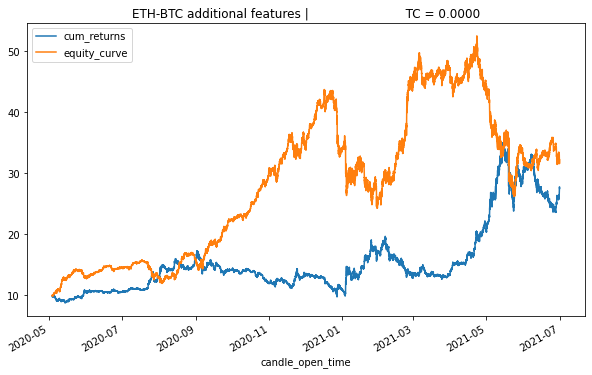

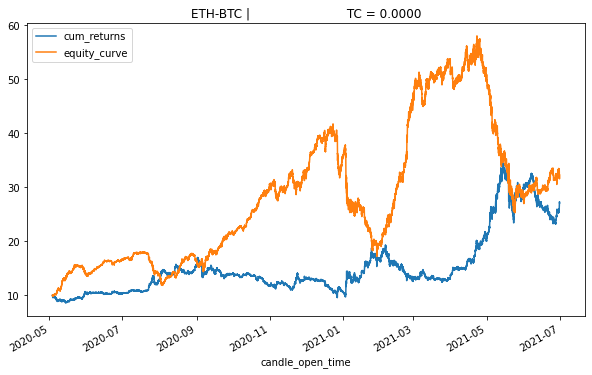

In [7]:
simulation_results = {}

for p in portfolios:
    print(f"\"{p['portfolio_name']}\"")
    %time name, res = simulate_portfolio(start_simulation, end_simulation, p)
    simulation_results[name] = res
    print(f"Final value: {res.iloc[-1,-1]}\n\n")

# END OF SIMULATION

In [8]:
for (k,v),p in zip(simulation_results.items(),portfolios):
    print(k)
    print(f"Portfolio simulation for {p['starting_funds']} {p['starting_coin']} trading against {p['pair_coin']}")
    display(v[v['actual_action']!='none'].rename(columns={'fund1':f"{p['starting_coin']} holding",'fund2':f"{p['pair_coin']} holding",'total_value':f'{p["starting_coin"]} value after trade'}))
    display(v['actual_action'].value_counts())

ETH <-> BTC s0_momentum additional feature no fees
Portfolio simulation for 10 ETH trading against BTC


,open,high,low,close,trade_model_decision,execute_price,actual_action,ETH holding,BTC holding,ETH value after trade
candle_open_time,,,,,,,,,,
2020-05-04 03:15:00,0.023324,0.023338,0.023289,0.023308,-1.0,0.023308,sell,0.000000,0.233080,10.000000
2020-05-04 03:45:00,0.023261,0.023333,0.023250,0.023318,1.0,0.023318,buy,9.995711,0.000000,9.995711
2020-05-04 04:00:00,0.023322,0.023322,0.023100,0.023155,-1.0,0.023155,sell,0.000000,0.231451,9.995711
2020-05-04 04:15:00,0.023151,0.023156,0.023075,0.023085,1.0,0.023085,buy,10.026021,0.000000,10.026021
2020-05-04 05:45:00,0.022949,0.023019,0.022915,0.023011,-1.0,0.023011,sell,0.000000,0.230709,10.026021
...,...,...,...,...,...,...,...,...,...,...
2021-06-30 16:00:00,0.061503,0.061782,0.061376,0.061740,-1.0,0.061740,sell,0.000000,0.586649,9.501932
2021-06-30 22:15:00,0.064633,0.064793,0.064607,0.064642,1.0,0.064642,buy,9.075357,0.000000,9.075357
2021-06-30 22:45:00,0.064776,0.064800,0.064533,0.064684,-1.0,0.064684,sell,0.000000,0.587030,9.075357


none    30652
sell     4936
buy      4935
Name: actual_action, dtype: int64

ETH <-> BTC s0_momentum no fees
Portfolio simulation for 10 ETH trading against BTC


,open,high,low,close,trade_model_decision,execute_price,actual_action,ETH holding,BTC holding,ETH value after trade
candle_open_time,,,,,,,,,,
2020-05-03 14:00:00,0.023817,0.023896,0.023802,0.023853,-1.0,0.023853,sell,0.000000,0.238530,10.000000
2020-05-03 14:45:00,0.023737,0.023765,0.023600,0.023698,1.0,0.023698,buy,10.065406,0.000000,10.065406
2020-05-03 15:30:00,0.023679,0.023697,0.023624,0.023651,-1.0,0.023651,sell,0.000000,0.238057,10.065406
2020-05-03 16:00:00,0.023614,0.023650,0.023549,0.023620,1.0,0.023620,buy,10.078617,0.000000,10.078617
2020-05-03 16:15:00,0.023622,0.023649,0.023598,0.023620,-1.0,0.023620,sell,0.000000,0.238057,10.078617
...,...,...,...,...,...,...,...,...,...,...
2021-06-30 21:15:00,0.064750,0.065000,0.064734,0.064800,-1.0,0.064800,sell,0.000000,0.573161,8.845071
2021-06-30 22:15:00,0.064633,0.064793,0.064607,0.064642,1.0,0.064642,buy,8.866690,0.000000,8.866690
2021-06-30 22:45:00,0.064776,0.064800,0.064533,0.064684,-1.0,0.064684,sell,0.000000,0.573533,8.866690


none    30130
sell     5222
buy      5221
Name: actual_action, dtype: int64

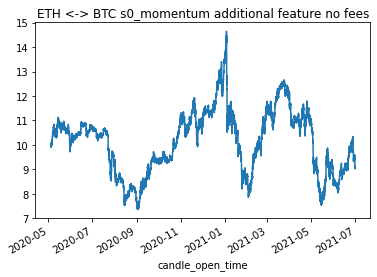

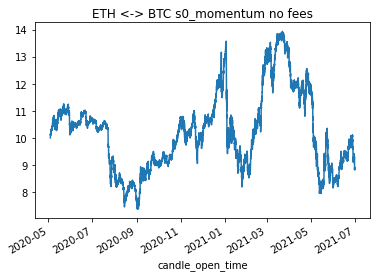

In [9]:
import matplotlib.pyplot as plt
for k,v in simulation_results.items():
    v[v['actual_action']!='none'].to_csv('sofo.csv')#.to_csv(f'./results/{k}.csv')
    fig, ax = plt.subplots()
    fig.patch.set_facecolor('white')
    ax.set_title(k)
    v.total_value.plot(figure=fig)

In [10]:
# Daily value
{k:v[v.index.hour + v.index.minute == 0]['total_value'] for k,v in simulation_results.items()}

{'ETH <-> BTC s0_momentum additional feature no fees': candle_open_time
 2020-05-05    10.000572
 2020-05-06    10.204806
 2020-05-07    10.489742
 2020-05-08    10.716222
 2020-05-09    10.693400
                 ...    
 2021-06-27    10.087260
 2021-06-28    10.045820
 2021-06-29     9.450309
 2021-06-30     9.520835
 2021-07-01     9.143365
 Name: total_value, Length: 423, dtype: float64,
 'ETH <-> BTC s0_momentum no fees': candle_open_time
 2020-05-04    10.128790
 2020-05-05    10.281819
 2020-05-06    10.440014
 2020-05-07    10.586471
 2020-05-08    10.775689
                 ...    
 2021-06-27     9.861773
 2021-06-28     9.908386
 2021-06-29     9.248513
 2021-06-30     9.318646
 2021-07-01     8.901752
 Name: total_value, Length: 424, dtype: float64}